In [1]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("Resources/final_panel_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,hisp,other_race,degree,09_updated_degree,updated_years_of_education,annual_weeks_worked,union_job,usual_hours_per_week,labor_income_from_business,years_experience,full_time_experience,part_time_experience,government_worker,hourly_wage,wage_inflation_factor,adj_hourly_wage,real_hourly_wage,full_time_job,potential_experience,high_school_or_less,bachelors_degree,advanced_degree,occupation_category,agriculture,mining_construction,durables,nondurables,transport,transport.1,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3
0,1981,1,1.0,10,34,16.0,1600,10000.0,1,0,0,0,1.0,1.0,17,32.0,0,50.0,0,12.0,12.0,0.0,0.0,6.0,2.31,14.0,3.0,1,12.0,0,1,0,Other,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1981,1,2.0,10,32,14.0,520,9095.0,0,1,0,0,0.0,0.0,14,13.0,1,40.0,0,14.0,11.0,3.0,0.0,17.0,2.31,40.0,4.0,1,12.0,1,0,0,Production,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2009,1,1.0,10,64,12.0,2550,45200.0,0,1,0,0,0.0,0.0,12,51.0,0,50.0,0,39.0,38.0,1.0,0.0,18.0,1.02,18.0,3.0,1,46.0,1,0,0,Production,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1999,1,2.0,10,50,12.0,3072,25000.0,1,0,0,0,0.0,0.0,12,51.0,0,60.0,0,30.0,30.0,0.0,0.0,8.0,1.27,10.0,2.0,1,32.0,1,0,0,Transportation and Materials Moving,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1990,1,3.0,10,26,12.0,2100,24500.0,1,0,0,0,0.0,0.0,12,50.0,0,42.0,0,8.0,8.0,0.0,0.0,12.0,1.57,18.0,3.0,1,8.0,1,0,0,Production,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
# Value count column
df['full_time_job'].value_counts()

1    29019
0     4379
Name: full_time_job, dtype: int64

In [4]:
# Display all columns
my_list = list(df)
print (my_list)

['year', 'gender', 'region', 'relation_to_head_of_house', 'age', 'years_of_education', 'annual_hours', 'annual_income', 'white', 'black', 'hisp', 'other_race', 'degree', '09_updated_degree', 'updated_years_of_education', 'annual_weeks_worked', 'union_job', 'usual_hours_per_week', 'labor_income_from_business', 'years_experience', 'full_time_experience', 'part_time_experience', 'government_worker', 'hourly_wage', 'wage_inflation_factor', 'adj_hourly_wage', 'real_hourly_wage', 'full_time_job', 'potential_experience', 'high_school_or_less', 'bachelors_degree', 'advanced_degree', 'occupation_category', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', '

In [5]:
# Drop the non-beneficial columns.
dropped_df = df.drop(['degree', '09_updated_degree', 'annual_hours', 'adj_hourly_wage', 'annual_weeks_worked', 'usual_hours_per_week', 'updated_years_of_education', 'occupation_category', 'labor_income_from_business', 'years_experience', 'hourly_wage', 'wage_inflation_factor', 'real_hourly_wage', 'potential_experience', 'year', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', 'physicians', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'office_admin', 'farmer', 'construction', 'production', 'transport.2', 'transport.3'], axis=1)
dropped_df

,gender,region,relation_to_head_of_house,age,years_of_education,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,government_worker,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,1.0,10,34,16.0,10000.0,1,0,0,0,0,12.0,0.0,0.0,1,0,1,0
1,1,2.0,10,32,14.0,9095.0,0,1,0,0,1,11.0,3.0,0.0,1,1,0,0
2,1,1.0,10,64,12.0,45200.0,0,1,0,0,0,38.0,1.0,0.0,1,1,0,0
3,1,2.0,10,50,12.0,25000.0,1,0,0,0,0,30.0,0.0,0.0,1,1,0,0
4,1,3.0,10,26,12.0,24500.0,1,0,0,0,0,8.0,0.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,2,1.0,20,34,16.0,37000.0,1,0,0,0,0,13.0,3.0,0.0,1,0,1,0
33394,2,2.0,20,54,12.0,22198.0,1,0,0,0,0,35.0,0.0,0.0,1,1,0,0
33395,2,3.0,20,33,10.0,7488.0,0,1,0,0,0,3.0,0.0,0.0,1,1,0,0
33396,2,3.0,10,25,11.0,18000.0,0,1,0,0,0,5.0,1.0,0.0,1,1,0,0


In [6]:
# Check for null values
df['gender'].isnull().values.any()

False

In [7]:
# Check for null values
df['annual_income'].isnull().values.any()

False

In [8]:
# Check for null values
df['full_time_experience'].isnull().values.any()

False

In [9]:
# Check for null values
df['part_time_experience'].isnull().values.any()

False

In [10]:
# Check for null values
df['region'].isnull().values.any()

True

In [11]:
# Check for null values
df['relation_to_head_of_house'].isnull().values.any()

False

In [12]:
# Check for null values
df['age'].isnull().values.any()

False

In [13]:
# Check for null values
df['years_of_education'].isnull().values.any()

True

In [14]:
# Check for null values
df['white'].isnull().values.any()

False

In [15]:
# Check for null values
df['black'].isnull().values.any()

False

In [16]:
# Check for null values
df['hisp'].isnull().values.any()

False

In [17]:
# Check for null values
df['other_race'].isnull().values.any()

False

In [18]:
# Check for null values
df['union_job'].isnull().values.any()

False

In [19]:
# Check for null values
df['government_worker'].isnull().values.any()

True

In [20]:
# Check for null values
df['full_time_job'].isnull().values.any()

False

In [21]:
# Check for null values
df['high_school_or_less'].isnull().values.any()

False

In [22]:
# Check for null values
df['bachelors_degree'].isnull().values.any()

False

In [23]:
# Check for null values
df['advanced_degree'].isnull().values.any()

False

In [24]:
# Drop the null-value columns.
model_df = dropped_df.drop(['region', 'years_of_education', 'government_worker'], axis=1)
pd.set_option('display.max_columns', None)
model_df.head()

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,1,0,0
2,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,1,0,0


In [25]:
# Make a dataframe with only male candidates
male_df = model_df[model_df['gender']== 1]
male_df

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,1,0,0
2,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16231,1,10,31,40000.0,1,0,0,0,1,12.0,0.0,1,1,0,0
16232,1,10,36,71900.0,0,1,0,0,0,16.0,0.0,1,0,0,1
16233,1,10,47,50000.0,0,1,0,0,1,22.0,1.0,1,1,0,0
16234,1,10,56,42000.0,1,0,0,0,0,33.0,3.0,1,1,0,0


In [26]:
# Define features set
X = male_df.copy()
X.drop("full_time_job", axis=1, inplace=True)
X.head()

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,0,1,0
1,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,0,0
2,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,0,0
3,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,0,0
4,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,0,0


In [27]:
# Define target vector
y = male_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,184
Actual 1,28,3819


Accuracy Score : 0.947770386794777
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.13      0.21       212
           1       0.95      0.99      0.97      3847

    accuracy                           0.95      4059
   macro avg       0.73      0.56      0.59      4059
weighted avg       0.93      0.95      0.93      4059



In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,184
Actual 1,28,3819


Accuracy Score : 0.947770386794777
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.13      0.21       212
           1       0.95      0.99      0.97      3847

    accuracy                           0.95      4059
   macro avg       0.73      0.56      0.59      4059
weighted avg       0.93      0.95      0.93      4059



In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4196370912567328, 'annual_income'),
 (0.19600289781683053, 'full_time_experience'),
 (0.19545125259959242, 'age'),
 (0.12345326524225146, 'part_time_experience'),
 (0.01777214824665203, 'union_job'),
 (0.009372988909298684, 'black'),
 (0.009050115046648481, 'high_school_or_less'),
 (0.008842204152049114, 'white'),
 (0.006965056803806974, 'bachelors_degree'),
 (0.005987653547138422, 'advanced_degree'),
 (0.004328153252193852, 'hisp'),
 (0.0031371731268051615, 'other_race'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

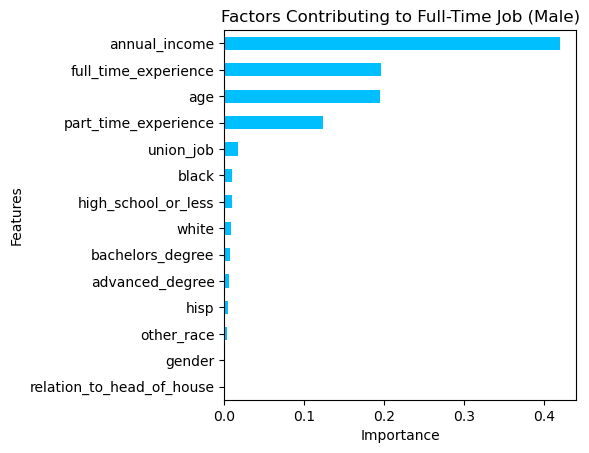

In [30]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Factors Contributing to Full-Time Job (Male)', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.subplots_adjust(left=0.35)
plt.savefig('full-time-male.png', dpi = 200)

In [31]:
# Drop the unecessary columns.
male2_df = male_df.drop(['annual_income'], axis=1)
pd.set_option('display.max_columns', None)
male2_df.head()

,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1,10,32,0,1,0,0,1,11.0,3.0,1,1,0,0
2,1,10,64,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1,10,50,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1,10,26,1,0,0,0,0,8.0,0.0,1,1,0,0


In [32]:
# Define features set
X = male2_df.copy()
X.drop("full_time_job", axis=1, inplace=True)
X.head()

,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,1,0,0,0,0,12.0,0.0,0,1,0
1,1,10,32,0,1,0,0,1,11.0,3.0,1,0,0
2,1,10,64,0,1,0,0,0,38.0,1.0,1,0,0
3,1,10,50,1,0,0,0,0,30.0,0.0,1,0,0
4,1,10,26,1,0,0,0,0,8.0,0.0,1,0,0


In [33]:
# Define target vector
y = male2_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,14,198
Actual 1,63,3784


Accuracy Score : 0.9356984478935698
Classification Report
              precision    recall  f1-score   support

           0       0.18      0.07      0.10       212
           1       0.95      0.98      0.97      3847

    accuracy                           0.94      4059
   macro avg       0.57      0.52      0.53      4059
weighted avg       0.91      0.94      0.92      4059



In [34]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.357914314307356, 'age'),
 (0.35566885836245066, 'full_time_experience'),
 (0.21210031467011717, 'part_time_experience'),
 (0.023943962622364565, 'union_job'),
 (0.010423998583530634, 'high_school_or_less'),
 (0.008444304267013895, 'bachelors_degree'),
 (0.008189867538455634, 'white'),
 (0.0077479478380669264, 'black'),
 (0.007125893379034299, 'advanced_degree'),
 (0.004356055208812563, 'hisp'),
 (0.00408448322279774, 'other_race'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male Overall Adjusted'}, ylabel='1'>

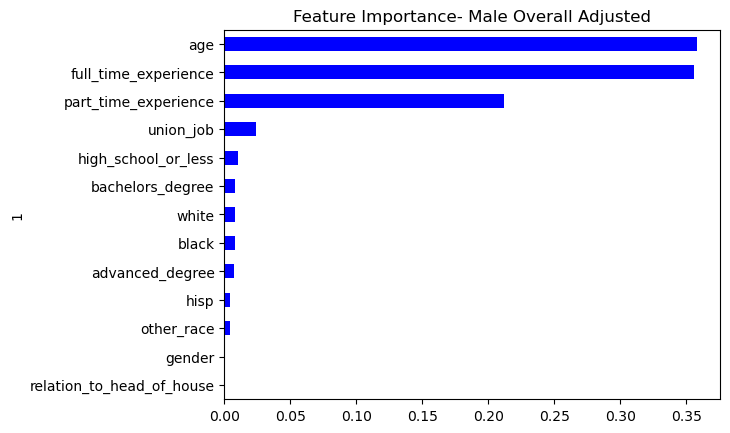

In [35]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Feature Importance- Male Overall Adjusted', legend=False)

In [36]:
# Make a dataframe with only male candidates
female_df = model_df[model_df['gender']== 2]
female_df

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
16236,2,20,35,11300.0,1,0,0,0,0,8.0,0.0,1,1,0,0
16237,2,10,26,28500.0,1,0,0,0,0,2.0,2.0,1,1,0,0
16238,2,20,59,53000.0,1,0,0,0,0,18.0,13.0,1,0,0,1
16239,2,10,45,49800.0,0,1,0,0,0,22.0,0.0,1,1,0,0
16240,2,20,30,26000.0,1,0,0,0,0,10.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,2,20,34,37000.0,1,0,0,0,0,13.0,3.0,1,0,1,0
33394,2,20,54,22198.0,1,0,0,0,0,35.0,0.0,1,1,0,0
33395,2,20,33,7488.0,0,1,0,0,0,3.0,0.0,1,1,0,0
33396,2,10,25,18000.0,0,1,0,0,0,5.0,1.0,1,1,0,0


In [37]:
# Define features set
X = female_df.copy()
X.drop("full_time_job", axis=1, inplace=True)
X.head()

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,high_school_or_less,bachelors_degree,advanced_degree
16236,2,20,35,11300.0,1,0,0,0,0,8.0,0.0,1,0,0
16237,2,10,26,28500.0,1,0,0,0,0,2.0,2.0,1,0,0
16238,2,20,59,53000.0,1,0,0,0,0,18.0,13.0,0,0,1
16239,2,10,45,49800.0,0,1,0,0,0,22.0,0.0,1,0,0
16240,2,20,30,26000.0,1,0,0,0,0,10.0,0.0,1,0,0


In [38]:
# Define target vector
y = female_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,387,497
Actual 1,186,3221


Accuracy Score : 0.8408296434397576
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.44      0.53       884
           1       0.87      0.95      0.90      3407

    accuracy                           0.84      4291
   macro avg       0.77      0.69      0.72      4291
weighted avg       0.83      0.84      0.83      4291



In [39]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.38391603708963756, 'annual_income'),
 (0.1850679916307413, 'full_time_experience'),
 (0.17473482328017453, 'age'),
 (0.1619690958831322, 'part_time_experience'),
 (0.02878891221206315, 'relation_to_head_of_house'),
 (0.015814603931515955, 'union_job'),
 (0.010339308685774281, 'black'),
 (0.009700852652742821, 'white'),
 (0.009695506436392616, 'high_school_or_less'),
 (0.007760358422560105, 'bachelors_degree'),
 (0.0054065800240878726, 'advanced_degree'),
 (0.003984361321496862, 'hisp'),
 (0.0028215684296807255, 'other_race'),
 (0.0, 'gender')]

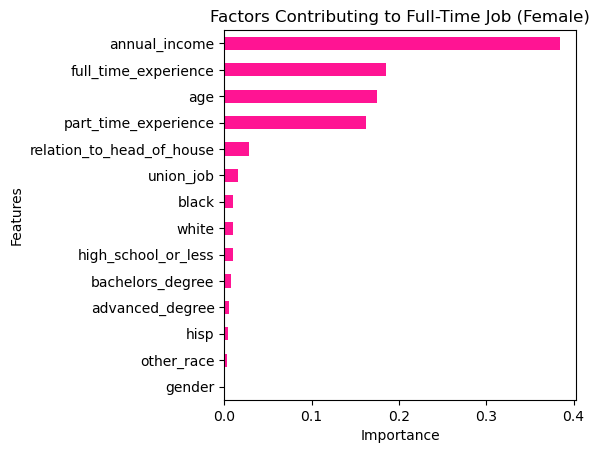

In [40]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Factors Contributing to Full-Time Job (Female)', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.subplots_adjust(left=0.35)
plt.savefig('full-time-female.png', dpi = 200)

In [41]:
# Drop the unecessary columns.
female2_df = female_df.drop(['annual_income'], axis=1)
pd.set_option('display.max_columns', None)
female2_df.head()

,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
16236,2,20,35,1,0,0,0,0,8.0,0.0,1,1,0,0
16237,2,10,26,1,0,0,0,0,2.0,2.0,1,1,0,0
16238,2,20,59,1,0,0,0,0,18.0,13.0,1,0,0,1
16239,2,10,45,0,1,0,0,0,22.0,0.0,1,1,0,0
16240,2,20,30,1,0,0,0,0,10.0,0.0,1,1,0,0


In [42]:
# Define features set
X = female2_df.copy()
X.drop("full_time_job", axis=1, inplace=True)
X.head()

,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,high_school_or_less,bachelors_degree,advanced_degree
16236,2,20,35,1,0,0,0,0,8.0,0.0,1,0,0
16237,2,10,26,1,0,0,0,0,2.0,2.0,1,0,0
16238,2,20,59,1,0,0,0,0,18.0,13.0,0,0,1
16239,2,10,45,0,1,0,0,0,22.0,0.0,1,0,0
16240,2,20,30,1,0,0,0,0,10.0,0.0,1,0,0


In [43]:
# Define target vector
y = female2_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,274,610
Actual 1,329,3078


Accuracy Score : 0.7811698904684223
Classification Report
              precision    recall  f1-score   support

           0       0.45      0.31      0.37       884
           1       0.83      0.90      0.87      3407

    accuracy                           0.78      4291
   macro avg       0.64      0.61      0.62      4291
weighted avg       0.76      0.78      0.76      4291



In [44]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3264196686296589, 'age'),
 (0.3212739888425201, 'full_time_experience'),
 (0.2465513663282966, 'part_time_experience'),
 (0.03609535295328998, 'relation_to_head_of_house'),
 (0.019395585484576847, 'union_job'),
 (0.010625443176585913, 'high_school_or_less'),
 (0.00943056615601229, 'white'),
 (0.008885221330203193, 'black'),
 (0.007504951545707159, 'bachelors_degree'),
 (0.006219591645113799, 'advanced_degree'),
 (0.004337382694542176, 'hisp'),
 (0.003260881213492989, 'other_race'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Female Adjusted'}, ylabel='1'>

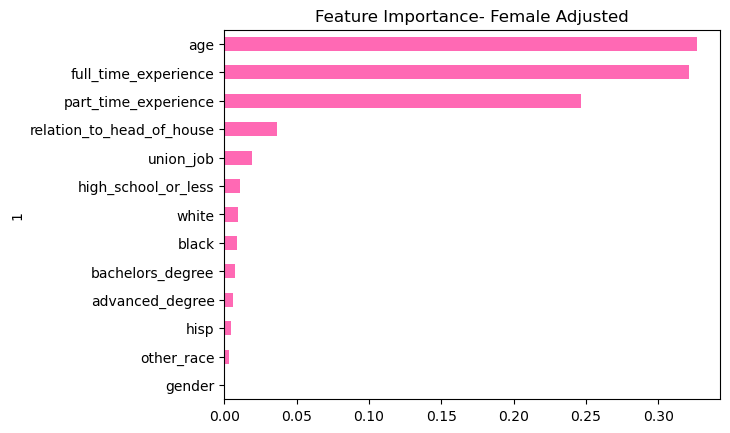

In [45]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='hotpink', title= 'Feature Importance- Female Adjusted', legend=False)